In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

# Save the dataset locally
df.to_csv("covid-data.csv", index=False)

print("Dataset downloaded and saved as 'covid-data.csv'.")


Dataset downloaded and saved as 'covid-data.csv'.


In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


High Level Understanding

In [3]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Data types of columns
print("\nData Types:\n", df.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# General Info
df.info()

Shape of dataset: (57394, 49)

Data Types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million           

Low Level Understanding

In [4]:
# Unique values in 'location'
print("Unique Locations:", df["location"].nunique())

# Continent with the highest frequency
print("Most Frequent Continent:\n", df["continent"].value_counts().idxmax())

# Max & mean of 'total_cases'
print("Max Total Cases:", df["total_cases"].max())
print("Mean Total Cases:", df["total_cases"].mean())

# Quartiles of 'total_deaths'
print("Quartiles of Total Deaths:\n", df["total_deaths"].quantile([0.25, 0.5, 0.75]))

# Continent with max 'human_development_index'
print("Continent with highest HDI:", df.loc[df["human_development_index"].idxmax(), "continent"])

# Continent with min 'gdp_per_capita'
print("Continent with lowest GDP per capita:", df.loc[df["gdp_per_capita"].idxmin(), "continent"])

Unique Locations: 216
Most Frequent Continent:
 Europe
Max Total Cases: 55154651.0
Mean Total Cases: 167797.3688753302
Quartiles of Total Deaths:
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64
Continent with highest HDI: Europe
Continent with lowest GDP per capita: Africa


Data Cleaning

In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

# Drop rows where 'continent' is missing
df.dropna(subset=["continent"], inplace=True)

# Fill all remaining missing values with 0
df.fillna(0, inplace=True)

# Verify missing values are handled
print("\nMissing Values After Cleaning:\n", df.isnull().sum().sum())  # Should print 0 if all missing values are handled

Missing Values in Each Column:
 iso_code                                323
continent                               646
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_million     57037
weekly_hosp_admissions                56749


Date Formatting

In [7]:
# Convert date column to datetime format with explicit format
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce")

# Extract month from date column
df["month"] = df["date"].dt.month

# Verify changes
print(df[["date", "month"]].head())

        date  month
0 2019-12-31     12
1 2020-01-01      1
2 2020-02-01      2
3 2020-03-01      3
4 2020-04-01      4


Data Aggregation

In [8]:
# Aggregating by continent
df_groupby = df.groupby("continent").max().reset_index()

# Display aggregated data
df_groupby.head()

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12


Feature Engineering

In [11]:
print("Non-null total_cases:", df['total_cases'].notnull().sum())
print("Non-null total_deaths:", df['total_deaths'].notnull().sum())
print(df[['total_cases', 'total_deaths']].describe())


Non-null total_cases: 53148
Non-null total_deaths: 43784
        total_cases   total_deaths
count  5.314800e+04   43784.000000
mean   8.482704e+04    3473.929518
std    5.051633e+05   15671.624008
min    1.000000e+00       1.000000
25%    1.750000e+02      13.000000
50%    2.071500e+03      84.000000
75%    2.155800e+04     709.000000
max    1.120549e+07  247220.000000


In [14]:
import numpy as np

# Create a copy to avoid chained assignment issues
df_copy = df.copy()

# Replace NaN values in total_cases & total_deaths with 0 (if needed)
df_copy["total_cases"] = df_copy["total_cases"].fillna(0)
df_copy["total_deaths"] = df_copy["total_deaths"].fillna(0)

# Ensure we are not dividing by zero
df_copy["total_deaths_to_total_cases"] = np.where(
    df_copy["total_cases"] > 0,
    df_copy["total_deaths"] / df_copy["total_cases"],
    0
)

# Check first 5 rows
df_copy[["total_cases", "total_deaths", "total_deaths_to_total_cases"]]

,total_cases,total_deaths,total_deaths_to_total_cases
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
...,...,...,...
56743,8696.0,255.0,0.029324
56744,8765.0,257.0,0.029321
56745,8786.0,257.0,0.029251
56746,8786.0,257.0,0.029251


Data Visualization

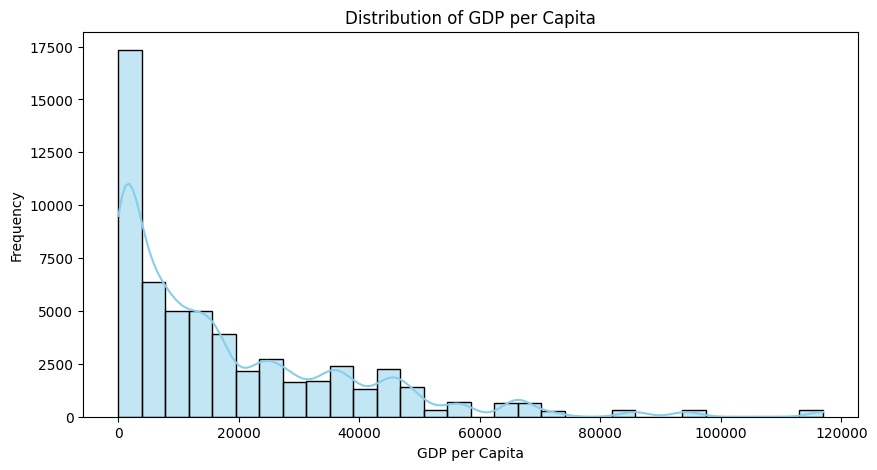

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df["gdp_per_capita"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.show()

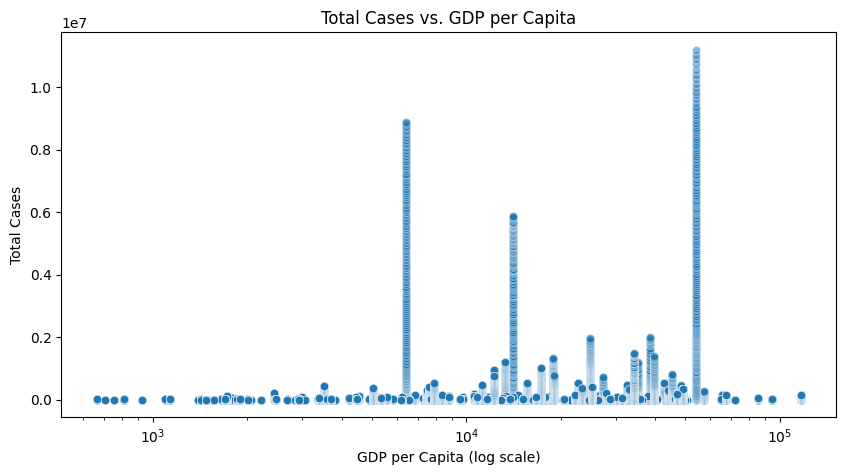

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["gdp_per_capita"], y=df["total_cases"], alpha=0.5)
plt.xscale("log")  # Log scale for better visibility
plt.title("Total Cases vs. GDP per Capita")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("Total Cases")
plt.show()

In [19]:
sns.pairplot(df_groupby)
plt.show()

<ipython-input-20-6d30d53e1974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_groupby, x="continent", y="total_cases", kind="bar", height=5, aspect=2, palette="coolwarm")


<Figure size 1000x500 with 0 Axes>

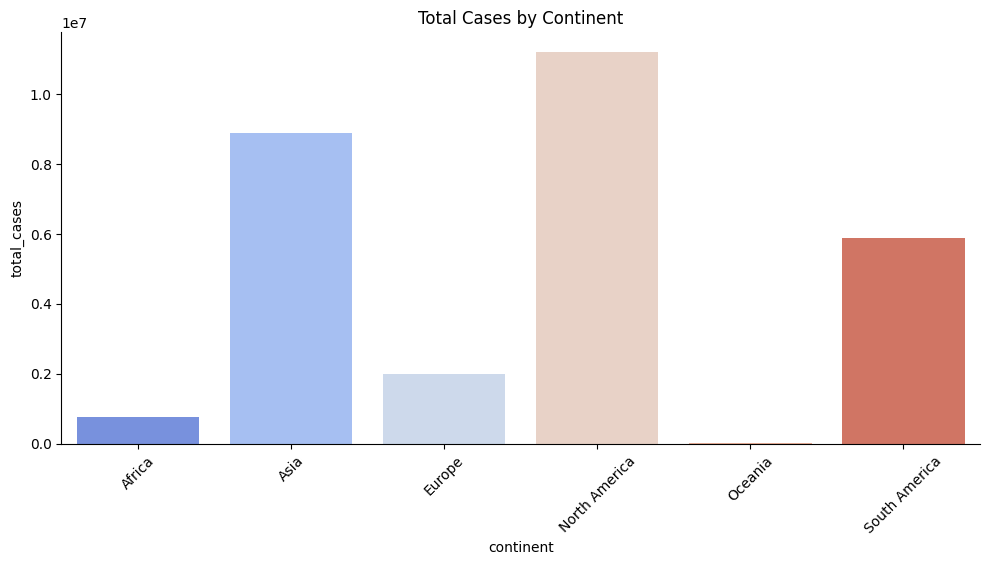

In [20]:
plt.figure(figsize=(10,5))
sns.catplot(data=df_groupby, x="continent", y="total_cases", kind="bar", height=5, aspect=2, palette="coolwarm")
plt.title("Total Cases by Continent")
plt.xticks(rotation=45)
plt.show()

In [21]:
df_groupby.to_csv("df_groupby.csv", index=False)